# 02 - Feautre Engineering

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import pickle

from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

import missingno as msno

In [4]:
with open('../Data/after_preparation_1.pkl', 'rb') as f:
    df_train = pickle.load(f)
    df_valid = pickle.load(f)
    df_test = pickle.load(f)

df_train.head()

,unit_id,obj_type,dim_m2,n_rooms,floor_no,floor_max,year_built,dist_centre,n_poi,dist_sch,...,price_z,src_month,loc_code,market_volatility,infrastructure_quality,neighborhood_crime_rate,popularity_index,green_space_ratio,estimated_maintenance_cost,global_economic_index
45366,f13df795472bee05,NaN,59.39,3.0,3.0,4.0,NaN,2.578,19.0,0.326,...,374895.93,2023-12,533f6886,358182.61,NaN,19.44,43.22,1.000,17.98,93.327971
86630,003ffcbd3294c3c9,0d6c4dfc,52.95,2.0,2.0,6.0,2023.0,8.413,13.0,0.387,...,783018.90,2023-12,693f303c,795187.23,1.13,77.42,31.27,0.999,24.08,94.280615
139489,f5d1fc8f4a154cd4,0d6c4dfc,24.55,2.0,2.0,4.0,1993.0,4.479,2.0,0.561,...,635701.75,2024-06,693f303c,599098.08,21.12,90.45,70.33,1.000,9.25,108.618716
24126,02376da3fe009bb0,NaN,57.58,3.0,3.0,3.0,2017.0,13.367,0.0,1.195,...,1292829.86,2024-05,693f303c,1503238.02,8.08,46.21,39.09,0.999,8.48,100.635935
151982,7b6bb74dcdff86a3,2a6d5c01,73.71,3.0,1.0,2.0,2016.0,9.365,0.0,2.159,...,895548.97,2023-10,693f303c,893331.75,9.38,42.41,59.41,0.999,24.94,93.385347


In [6]:
df_test.head()

,unit_id,obj_type,dim_m2,n_rooms,floor_no,floor_max,year_built,dist_centre,n_poi,dist_sch,...,price_z,src_month,loc_code,market_volatility,infrastructure_quality,neighborhood_crime_rate,popularity_index,green_space_ratio,estimated_maintenance_cost,global_economic_index
17069,0fe76762ee65128d,0d6c4dfc,47.05,2.0,1.0,8.0,1982.0,4.169,4.0,0.379,...,724269.39,2024-02,0ab06839,681871.90,55.51,46.40,52.14,1.000,17.00,105.378687
149288,f13957ad071f4362,0c238f18,58.60,2.0,4.0,6.0,1955.0,0.763,136.0,0.165,...,1277347.53,2023-10,693f303c,1422902.70,68.81,36.97,47.94,1.000,12.29,93.353060
79538,c1c30a9c3ec71feb,0d6c4dfc,48.05,2.0,4.0,4.0,1980.0,5.131,15.0,0.479,...,511780.46,2024-03,e0cff11b,414344.72,62.38,4.57,64.31,0.999,5.15,104.008563
114059,109c5d01a9974065,0d6c4dfc,48.97,3.0,10.0,10.0,1970.0,4.758,25.0,0.195,...,606035.83,2023-10,693f303c,611084.94,59.23,21.08,31.94,1.000,16.82,94.084297
74338,344c12a08897f304,0c238f18,97.57,3.0,4.0,4.0,1936.0,0.953,44.0,0.049,...,543979.79,2023-09,533f6886,645366.64,120.67,40.00,56.67,1.000,34.10,99.876853


## Dealing with Missing Values

In [9]:
columns_with_missings = df_train.columns[df_train.isnull().any()]
columns_with_missings.to_list()

['obj_type',
 'floor_no',
 'floor_max',
 'year_built',
 'dist_sch',
 'dist_clinic',
 'dist_post',
 'dist_kind',
 'dist_rest',
 'dist_uni',
 'dist_pharma',
 'build_mat',
 'cond_class',
 'has_lift',
 'infrastructure_quality']

In [31]:
# columns with missings
df_train[columns_with_missings].isnull().sum()

obj_type                  20320
floor_no                  16657
floor_max                  1139
year_built                15404
dist_sch                     86
dist_clinic                 341
dist_post                   119
dist_kind                    99
dist_rest                   254
dist_uni                   2624
dist_pharma                 147
build_mat                 37231
cond_class                70295
has_lift                   4643
infrastructure_quality    15404
dtype: int64

In [23]:
# value counts to detect Missing values
for col in columns_with_missings:
    print(f'Frequency counts for {col}:')
    print(df_train[col].value_counts(dropna=False))
    print('')

Frequency counts for obj_type:
obj_type
0d6c4dfc    43759
NaN         20320
2a6d5c01    15636
0c238f18    14157
Name: count, dtype: int64

Frequency counts for floor_no:
floor_no
1.0     18173
NaN     16657
2.0     16249
3.0     16151
4.0     11474
5.0      4445
6.0      2665
7.0      2121
8.0      1591
9.0      1437
10.0     1343
11.0      538
12.0      301
14.0      211
13.0      164
15.0      116
17.0       95
16.0       67
24.0       14
18.0       13
20.0       11
23.0       10
29.0        8
22.0        6
25.0        4
21.0        4
19.0        3
27.0        1
Name: count, dtype: int64

Frequency counts for floor_max:
floor_max
4.0     29384
3.0     17238
5.0      9231
10.0     8378
2.0      7356
6.0      5090
7.0      3396
8.0      2740
11.0     2500
1.0      2119
9.0      1249
NaN      1139
12.0     1021
15.0      718
17.0      575
16.0      484
13.0      423
14.0      317
18.0      102
24.0       68
23.0       68
19.0       66
22.0       47
20.0       45
25.0       36
27.0      

In [25]:
# value counts in proportions to detect missing values
for col in columns_with_missings:
    print(f'Frequency counts for {col} in proportions:')
    print(df_train[col].value_counts(dropna=False, normalize = True))
    print('')

Frequency counts for obj_type in proportions:
obj_type
0d6c4dfc    0.466156
NaN         0.216465
2a6d5c01    0.166567
0c238f18    0.150812
Name: proportion, dtype: float64

Frequency counts for floor_no in proportions:
floor_no
1.0     0.193593
NaN     0.177444
2.0     0.173097
3.0     0.172053
4.0     0.122230
5.0     0.047352
6.0     0.028390
7.0     0.022595
8.0     0.016949
9.0     0.015308
10.0    0.014307
11.0    0.005731
12.0    0.003206
14.0    0.002248
13.0    0.001747
15.0    0.001236
17.0    0.001012
16.0    0.000714
24.0    0.000149
18.0    0.000138
20.0    0.000117
23.0    0.000107
29.0    0.000085
22.0    0.000064
25.0    0.000043
21.0    0.000043
19.0    0.000032
27.0    0.000011
Name: proportion, dtype: float64

Frequency counts for floor_max in proportions:
floor_max
4.0     0.313022
3.0     0.183633
5.0     0.098336
10.0    0.089249
2.0     0.078362
6.0     0.054223
7.0     0.036177
8.0     0.029189
11.0    0.026632
1.0     0.022573
9.0     0.013305
NaN     0.012134
1

<Axes: >

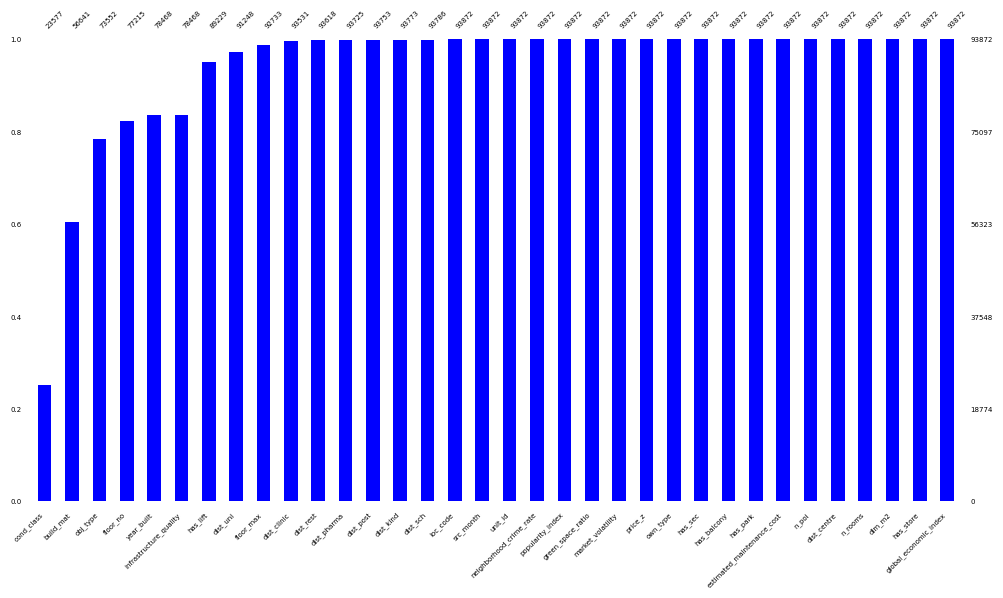

In [27]:
msno.bar(
    df_train,
    figsize = (12, 6),
    color = 'blue',
    sort = 'ascending',
    fontsize = 5
)

<Axes: >

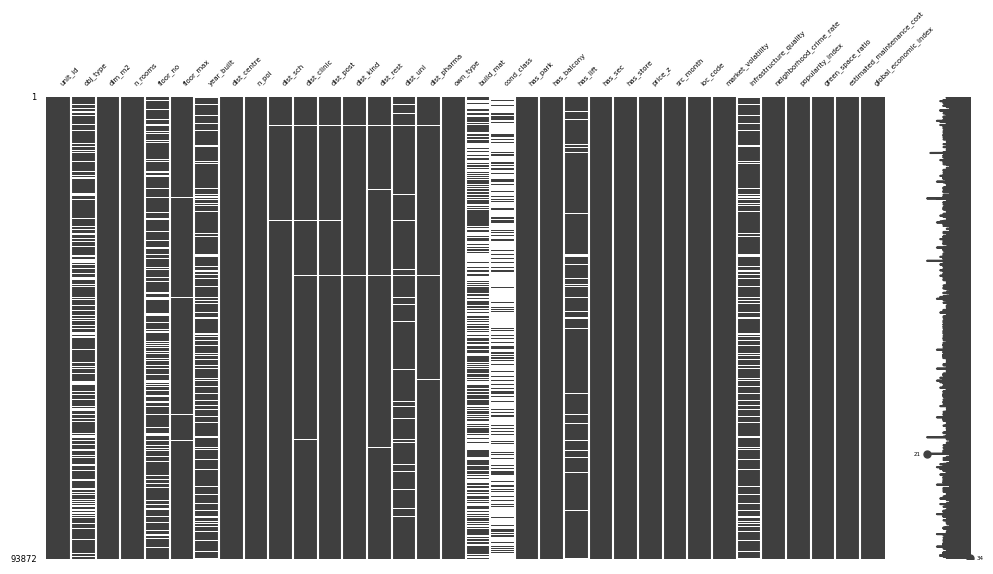

In [29]:
msno.matrix(
    df_train,
    figsize = (12, 6),
    fontsize = 5
)

<Axes: >

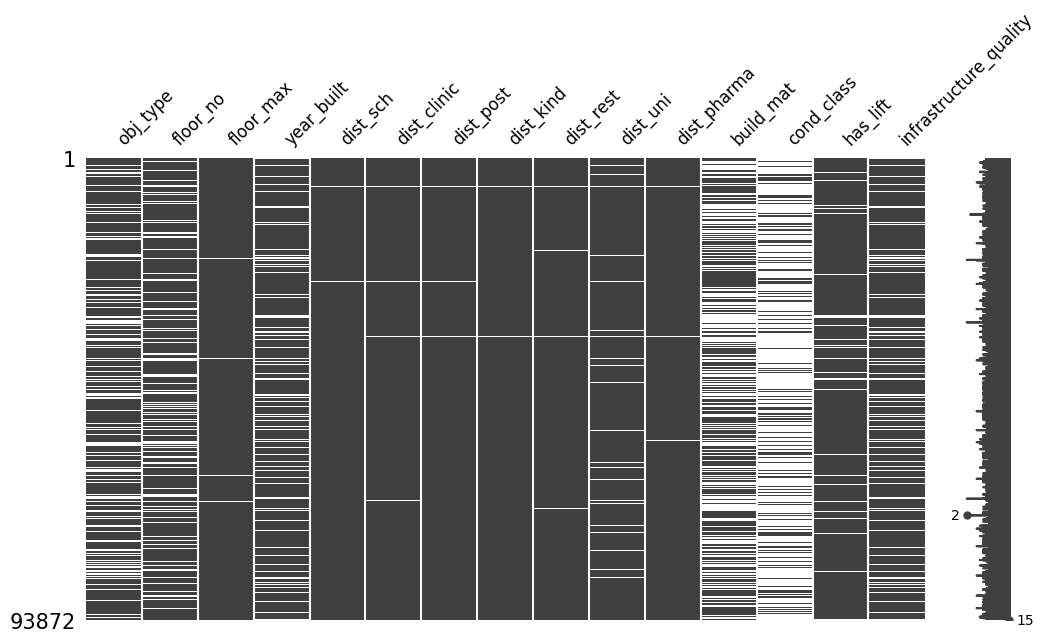

In [33]:
# it is hard to read the matrix plot with so many columns
# so lets select only the columns with missing values

msno.matrix(
    df_train[columns_with_missings],
    figsize = (12, 6),
    fontsize = 12
)

# - If the color is dark, the data exists.
# - If the color is white, the data is missing.
# - A mini-graph on the right shows the overall density of missing values 
#   across the dataset.

<Axes: >

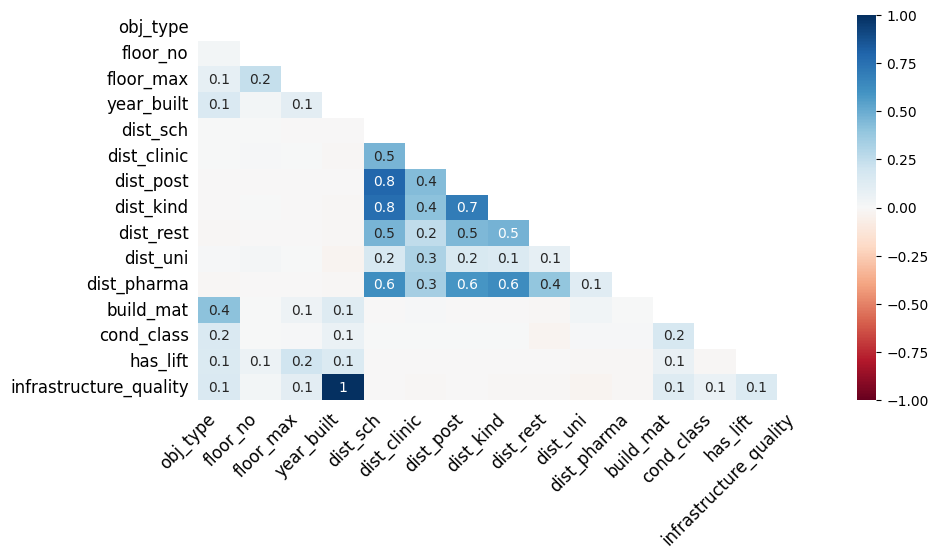

In [37]:
# we can visualize the nullity correlation (range -1 to 1)
# to measure the missing data relationship between features
msno.heatmap(
    df_train,
    figsize = (10, 5),
    fontsize = 12
)

In [39]:
df_train[columns_with_missings].info()

<class 'pandas.core.frame.DataFrame'>
Index: 93872 entries, 45366 to 15725
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   obj_type                73552 non-null  object 
 1   floor_no                77215 non-null  float64
 2   floor_max               92733 non-null  float64
 3   year_built              78468 non-null  float64
 4   dist_sch                93786 non-null  float64
 5   dist_clinic             93531 non-null  float64
 6   dist_post               93753 non-null  float64
 7   dist_kind               93773 non-null  float64
 8   dist_rest               93618 non-null  float64
 9   dist_uni                91248 non-null  float64
 10  dist_pharma             93725 non-null  float64
 11  build_mat               56641 non-null  object 
 12  cond_class              23577 non-null  object 
 13  has_lift                89229 non-null  object 
 14  infrastructure_quality  78468 non-null 

In [51]:
# for numerical variables in missings
quantitative_cols = [
    'floor_no', 'floor_max', 'year_built', 'dist_sch', 'dist_clinic', 'dist_post', 
    'dist_kind', 'dist_rest', 'dist_uni', 'dist_pharma', 'infrastructure_quality'
]

# for categorical variables in missings
qualitative_cols = [
    'obj_type', 'build_mat', 'cond_class', 'has_lift'
]

In [63]:
# for numerical variables, testing different handling missing values methods
df_train_quantitative_copy = df_train[quantitative_cols].copy()
df_train_quantitative_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93872 entries, 45366 to 15725
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   floor_no                77215 non-null  float64
 1   floor_max               92733 non-null  float64
 2   year_built              78468 non-null  float64
 3   dist_sch                93786 non-null  float64
 4   dist_clinic             93531 non-null  float64
 5   dist_post               93753 non-null  float64
 6   dist_kind               93773 non-null  float64
 7   dist_rest               93618 non-null  float64
 8   dist_uni                91248 non-null  float64
 9   dist_pharma             93725 non-null  float64
 10  infrastructure_quality  78468 non-null  float64
dtypes: float64(11)
memory usage: 8.6 MB


In [65]:
# for categorical variables, testing different handling missing values methods
df_train_qualitative_copy = df_train[qualitative_cols].copy()
df_train_qualitative_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93872 entries, 45366 to 15725
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   obj_type    73552 non-null  object
 1   build_mat   56641 non-null  object
 2   cond_class  23577 non-null  object
 3   has_lift    89229 non-null  object
dtypes: object(4)
memory usage: 3.6+ MB


In [83]:
df_train_quantitative_original = df_train[quantitative_cols].copy()
df_train_qualitative_original = df_train[qualitative_cols].copy()

In [85]:
df_train_quantitative_original.head()

,floor_no,floor_max,year_built,dist_sch,dist_clinic,dist_post,dist_kind,dist_rest,dist_uni,dist_pharma,infrastructure_quality
45366,3.0,4.0,NaN,0.326,0.462,0.177,0.147,0.088,0.707,0.096,NaN
86630,2.0,6.0,2023.0,0.387,1.423,0.831,0.108,0.093,3.843,0.475,1.13
139489,2.0,4.0,1993.0,0.561,0.611,0.460,0.316,0.693,2.862,0.511,21.12
24126,3.0,3.0,2017.0,1.195,3.004,1.046,1.540,1.196,3.472,1.284,8.08
151982,1.0,2.0,2016.0,2.159,4.349,0.842,1.644,0.664,3.750,0.843,9.38


## Imputation

---
### Mean Imputation

In [68]:
# replace missings for quantitative variables with sample average
# we will use simple imputation

imputer_mean = SimpleImputer(strategy = 'mean')

df_train_quantitative_copy[quantitative_cols] = imputer_mean.fit_transform(
    df_train_quantitative_copy[quantitative_cols]
)

In [70]:
df_train_quantitative_copy.head()

,floor_no,floor_max,year_built,dist_sch,dist_clinic,dist_post,dist_kind,dist_rest,dist_uni,dist_pharma,infrastructure_quality
45366,3.0,4.0,1986.088431,0.326,0.462,0.177,0.147,0.088,0.707,0.096,37.985636
86630,2.0,6.0,2023.000000,0.387,1.423,0.831,0.108,0.093,3.843,0.475,1.130000
139489,2.0,4.0,1993.000000,0.561,0.611,0.460,0.316,0.693,2.862,0.511,21.120000
24126,3.0,3.0,2017.000000,1.195,3.004,1.046,1.540,1.196,3.472,1.284,8.080000
151982,1.0,2.0,2016.000000,2.159,4.349,0.842,1.644,0.664,3.750,0.843,9.380000


In [158]:
# for col in quantitative_cols:
#     print(f'Frequency counts for {col}:')
#     print(df_train_quantitative_copy[col].value_counts(dropna=False, normalize = True))
#     print()

In [87]:
# change the names of the columns to indicate that they were imputed and how
df_train_quantitative_copy.rename(
    columns = {col: col + '_mean' for col in quantitative_cols}, inplace = True
)

# and merge this data with the dataset including the original columns
df_train_quantitative_original = pd.concat([
    df_train_quantitative_original, df_train_quantitative_copy
], axis = 1)

df_train_quantitative_original.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93872 entries, 45366 to 15725
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   floor_no                     77215 non-null  float64
 1   floor_max                    92733 non-null  float64
 2   year_built                   78468 non-null  float64
 3   dist_sch                     93786 non-null  float64
 4   dist_clinic                  93531 non-null  float64
 5   dist_post                    93753 non-null  float64
 6   dist_kind                    93773 non-null  float64
 7   dist_rest                    93618 non-null  float64
 8   dist_uni                     91248 non-null  float64
 9   dist_pharma                  93725 non-null  float64
 10  infrastructure_quality       78468 non-null  float64
 11  floor_no_mean                93872 non-null  float64
 12  floor_max_mean               93872 non-null  float64
 13  year_built_mean  

---
### Mode Imputation

In [105]:
df_train_quantitative_copy2 = df_train[quantitative_cols].copy()

df_train_quantitative_copy2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93872 entries, 45366 to 15725
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   floor_no                77215 non-null  float64
 1   floor_max               92733 non-null  float64
 2   year_built              78468 non-null  float64
 3   dist_sch                93786 non-null  float64
 4   dist_clinic             93531 non-null  float64
 5   dist_post               93753 non-null  float64
 6   dist_kind               93773 non-null  float64
 7   dist_rest               93618 non-null  float64
 8   dist_uni                91248 non-null  float64
 9   dist_pharma             93725 non-null  float64
 10  infrastructure_quality  78468 non-null  float64
dtypes: float64(11)
memory usage: 8.6 MB


In [107]:
# Imputation based on the most frequent value
# can be applied also to categorical variables

imputer_most_frequent = SimpleImputer(strategy = 'most_frequent')

df_train_quantitative_copy2[quantitative_cols] = imputer_most_frequent.fit_transform(
    df_train_quantitative_copy2[quantitative_cols]
)

In [111]:
# lets change the names of the columns to indicate
# that they were imputed and how

df_train_quantitative_copy2.rename(
    columns = {col: col + '_mode' for col in quantitative_cols},
    inplace = True
)

# and merge this data with the dataset including the original columns
df_train_quantitative_original = pd.concat([
    df_train_quantitative_original, df_train_quantitative_copy2
], axis = 1)

df_train_quantitative_original.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93872 entries, 45366 to 15725
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   floor_no                     77215 non-null  float64
 1   floor_max                    92733 non-null  float64
 2   year_built                   78468 non-null  float64
 3   dist_sch                     93786 non-null  float64
 4   dist_clinic                  93531 non-null  float64
 5   dist_post                    93753 non-null  float64
 6   dist_kind                    93773 non-null  float64
 7   dist_rest                    93618 non-null  float64
 8   dist_uni                     91248 non-null  float64
 9   dist_pharma                  93725 non-null  float64
 10  infrastructure_quality       78468 non-null  float64
 11  floor_no_mean                93872 non-null  float64
 12  floor_max_mean               93872 non-null  float64
 13  year_built_mean  

---
### KNN Imputer

In [122]:
# creating copied sample for KNN imputer
df_train_quantitative_copy3 = df_train[quantitative_cols].copy()

In [124]:
# replacing missings for all quantitative variables based on KNN model imputation
# with a KNNImputer (works only for numerical variables)

imputer_knn = KNNImputer(
    n_neighbors = 5,
    # remember that distance weighting worked better
    weights = 'distance'
)

df_train_quantitative_copy3[quantitative_cols] = imputer_knn.fit_transform(
    df_train_quantitative_copy3[quantitative_cols]
)

In [126]:
# lets change the names of the columns to indicate
# that they were imputed and how

df_train_quantitative_copy3.rename(
    columns = {col: col + '_knn' for col in quantitative_cols},
    inplace = True
)

# and merge this data with the dataset including the original columns
df_train_quantitative_original = pd.concat([
    df_train_quantitative_original, df_train_quantitative_copy3
], axis = 1)

df_train_quantitative_original.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93872 entries, 45366 to 15725
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   floor_no                     77215 non-null  float64
 1   floor_max                    92733 non-null  float64
 2   year_built                   78468 non-null  float64
 3   dist_sch                     93786 non-null  float64
 4   dist_clinic                  93531 non-null  float64
 5   dist_post                    93753 non-null  float64
 6   dist_kind                    93773 non-null  float64
 7   dist_rest                    93618 non-null  float64
 8   dist_uni                     91248 non-null  float64
 9   dist_pharma                  93725 non-null  float64
 10  infrastructure_quality       78468 non-null  float64
 11  floor_no_mean                93872 non-null  float64
 12  floor_max_mean               93872 non-null  float64
 13  year_built_mean  

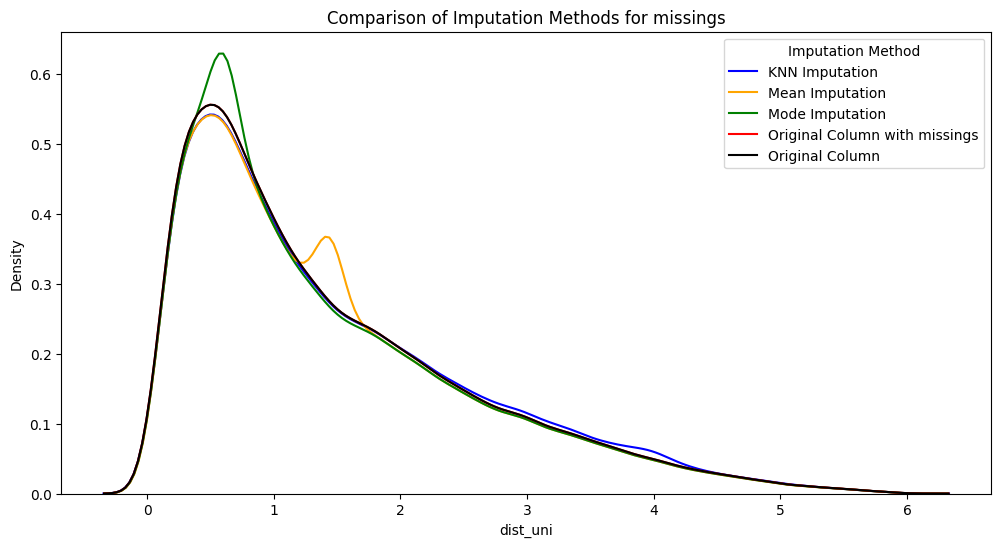

In [138]:
# and the same for variables which name starts with
# 'First_Flr_SF' (20% of non-randomly missing values)

plt.figure(figsize=(12, 6))
sns.kdeplot(data = df_train_quantitative_copy3,
             x = 'dist_uni_knn',
             label = 'KNN Imputation',
             color = 'blue')
sns.kdeplot(data = df_train_quantitative_copy,
             x = 'dist_uni_mean',
             label = 'Mean Imputation',
             color = 'orange')
sns.kdeplot(data = df_train_quantitative_copy2,
             x = 'dist_uni_mode',
             label = 'Mode Imputation',
             color = 'green')
sns.kdeplot(data = df_train_quantitative_original,
                x = 'dist_uni',
                    label = 'Original Column with missings',
                    color = 'red')
sns.kdeplot(data = df_train_quantitative_original,
                x = 'dist_uni',
                    label = 'Original Column',
                    color = 'black')
# Add the legend
plt.legend(title='Imputation Method')
plt.xlabel('dist_uni')
plt.ylabel('Density')
plt.title('Comparison of Imputation Methods for missings')
plt.show()

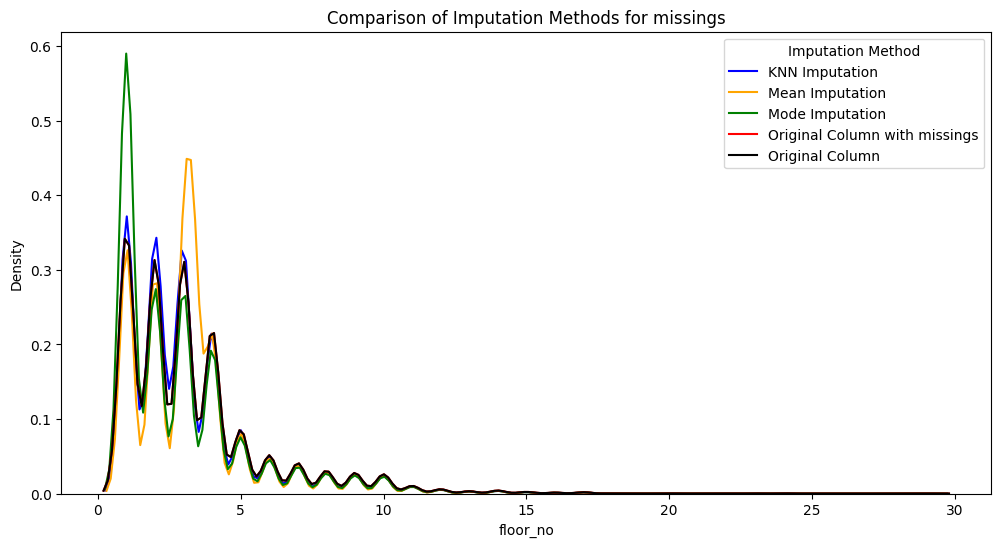

In [160]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data = df_train_quantitative_copy3,
             x = 'floor_no_knn',
             label = 'KNN Imputation',
             color = 'blue')
sns.kdeplot(data = df_train_quantitative_copy,
             x = 'floor_no_mean',
             label = 'Mean Imputation',
             color = 'orange')
sns.kdeplot(data = df_train_quantitative_copy2,
             x = 'floor_no_mode',
             label = 'Mode Imputation',
             color = 'green')
sns.kdeplot(data = df_train_quantitative_original,
                x = 'floor_no',
                    label = 'Original Column with missings',
                    color = 'red')
sns.kdeplot(data = df_train_quantitative_original,
                x = 'floor_no',
                    label = 'Original Column',
                    color = 'black')
# Add the legend
plt.legend(title='Imputation Method')
plt.xlabel('floor_no')
plt.ylabel('Density')
plt.title('Comparison of Imputation Methods for missings')
plt.show()

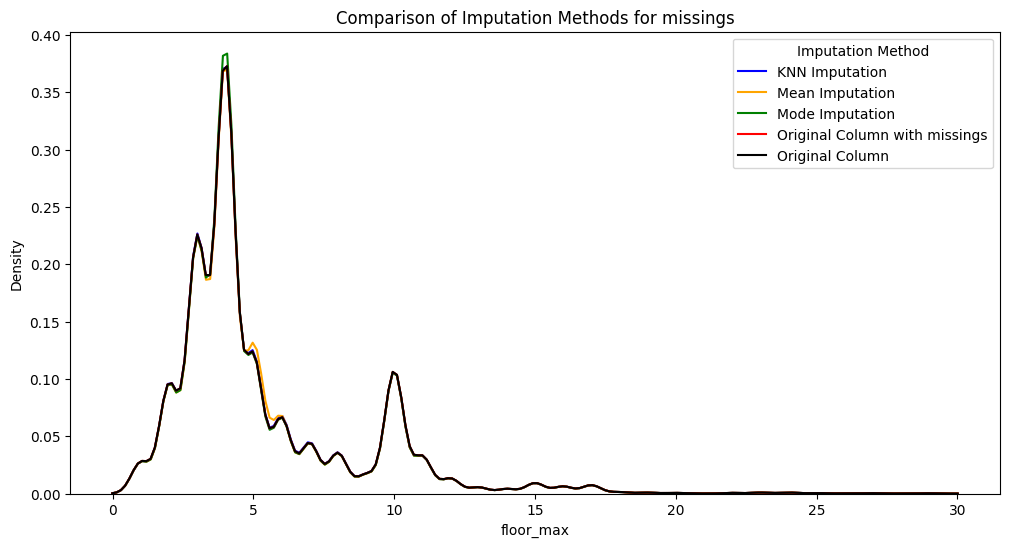

In [140]:
# and the same for variables which name starts with
# 'First_Flr_SF' (20% of non-randomly missing values)

plt.figure(figsize=(12, 6))
sns.kdeplot(data = df_train_quantitative_copy3,
             x = 'floor_max_knn',
             label = 'KNN Imputation',
             color = 'blue')
sns.kdeplot(data = df_train_quantitative_copy,
             x = 'floor_max_mean',
             label = 'Mean Imputation',
             color = 'orange')
sns.kdeplot(data = df_train_quantitative_copy2,
             x = 'floor_max_mode',
             label = 'Mode Imputation',
             color = 'green')
sns.kdeplot(data = df_train_quantitative_original,
                x = 'floor_max',
                    label = 'Original Column with missings',
                    color = 'red')
sns.kdeplot(data = df_train_quantitative_original,
                x = 'floor_max',
                    label = 'Original Column',
                    color = 'black')
# Add the legend
plt.legend(title='Imputation Method')
plt.xlabel('floor_max')
plt.ylabel('Density')
plt.title('Comparison of Imputation Methods for missings')
plt.show()

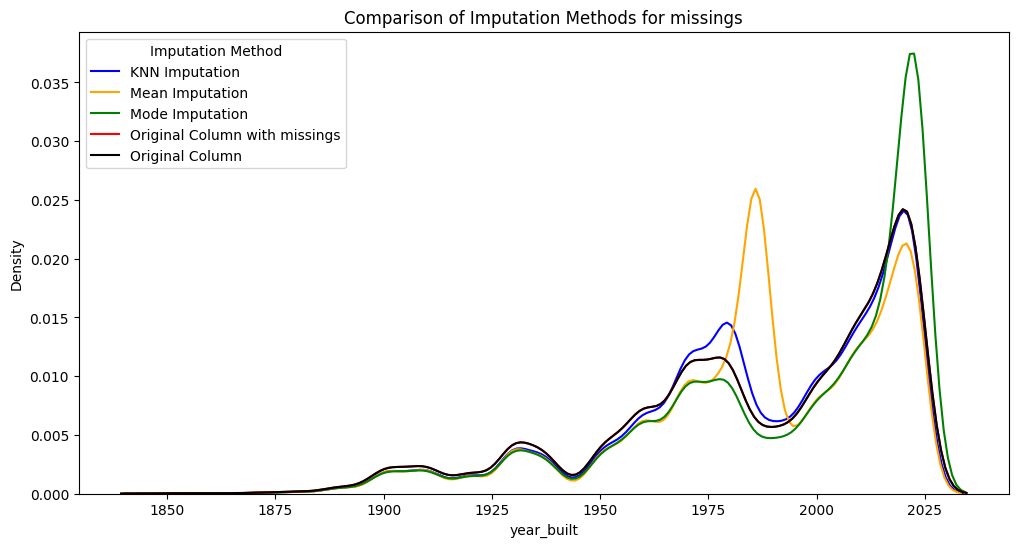

In [142]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data = df_train_quantitative_copy3,
             x = 'year_built_knn',
             label = 'KNN Imputation',
             color = 'blue')
sns.kdeplot(data = df_train_quantitative_copy,
             x = 'year_built_mean',
             label = 'Mean Imputation',
             color = 'orange')
sns.kdeplot(data = df_train_quantitative_copy2,
             x = 'year_built_mode',
             label = 'Mode Imputation',
             color = 'green')
sns.kdeplot(data = df_train_quantitative_original,
                x = 'year_built',
                    label = 'Original Column with missings',
                    color = 'red')
sns.kdeplot(data = df_train_quantitative_original,
                x = 'year_built',
                    label = 'Original Column',
                    color = 'black')
# Add the legend
plt.legend(title='Imputation Method')
plt.xlabel('year_built')
plt.ylabel('Density')
plt.title('Comparison of Imputation Methods for missings')
plt.show()

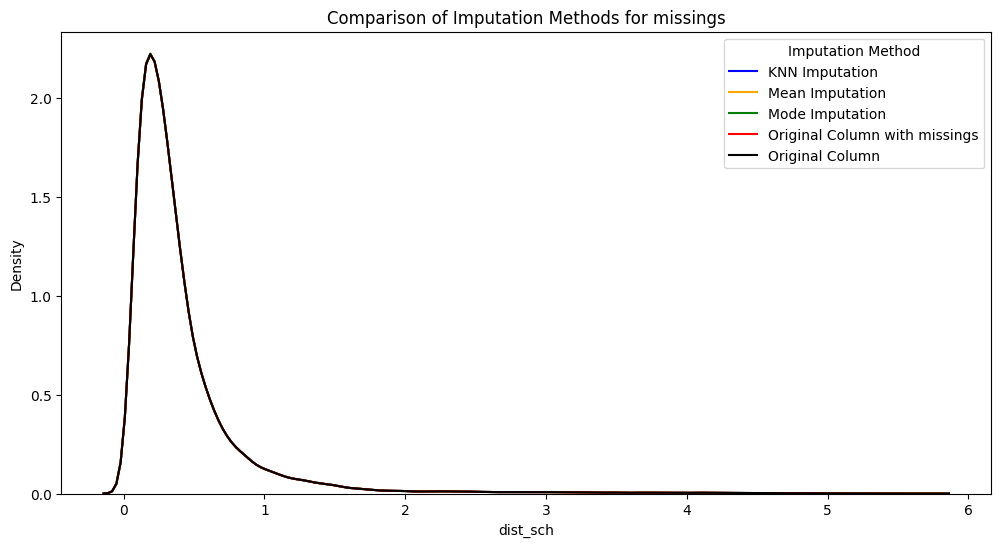

In [144]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data = df_train_quantitative_copy3,
             x = 'dist_sch_knn',
             label = 'KNN Imputation',
             color = 'blue')
sns.kdeplot(data = df_train_quantitative_copy,
             x = 'dist_sch_mean',
             label = 'Mean Imputation',
             color = 'orange')
sns.kdeplot(data = df_train_quantitative_copy2,
             x = 'dist_sch_mode',
             label = 'Mode Imputation',
             color = 'green')
sns.kdeplot(data = df_train_quantitative_original,
                x = 'dist_sch',
                    label = 'Original Column with missings',
                    color = 'red')
sns.kdeplot(data = df_train_quantitative_original,
                x = 'dist_sch',
                    label = 'Original Column',
                    color = 'black')
# Add the legend
plt.legend(title='Imputation Method')
plt.xlabel('dist_sch')
plt.ylabel('Density')
plt.title('Comparison of Imputation Methods for missings')
plt.show()

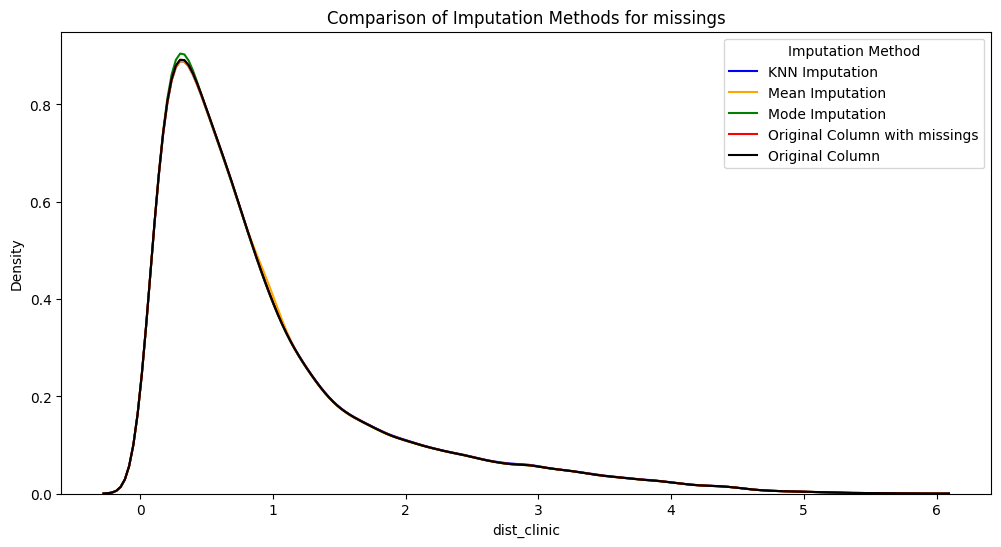

In [146]:
# and the same for variables which name starts with
# 'First_Flr_SF' (20% of non-randomly missing values)

plt.figure(figsize=(12, 6))
sns.kdeplot(data = df_train_quantitative_copy3,
             x = 'dist_clinic_knn',
             label = 'KNN Imputation',
             color = 'blue')
sns.kdeplot(data = df_train_quantitative_copy,
             x = 'dist_clinic_mean',
             label = 'Mean Imputation',
             color = 'orange')
sns.kdeplot(data = df_train_quantitative_copy2,
             x = 'dist_clinic_mode',
             label = 'Mode Imputation',
             color = 'green')
sns.kdeplot(data = df_train_quantitative_original,
                x = 'dist_clinic',
                    label = 'Original Column with missings',
                    color = 'red')
sns.kdeplot(data = df_train_quantitative_original,
                x = 'dist_clinic',
                    label = 'Original Column',
                    color = 'black')
# Add the legend
plt.legend(title='Imputation Method')
plt.xlabel('dist_clinic')
plt.ylabel('Density')
plt.title('Comparison of Imputation Methods for missings')
plt.show()

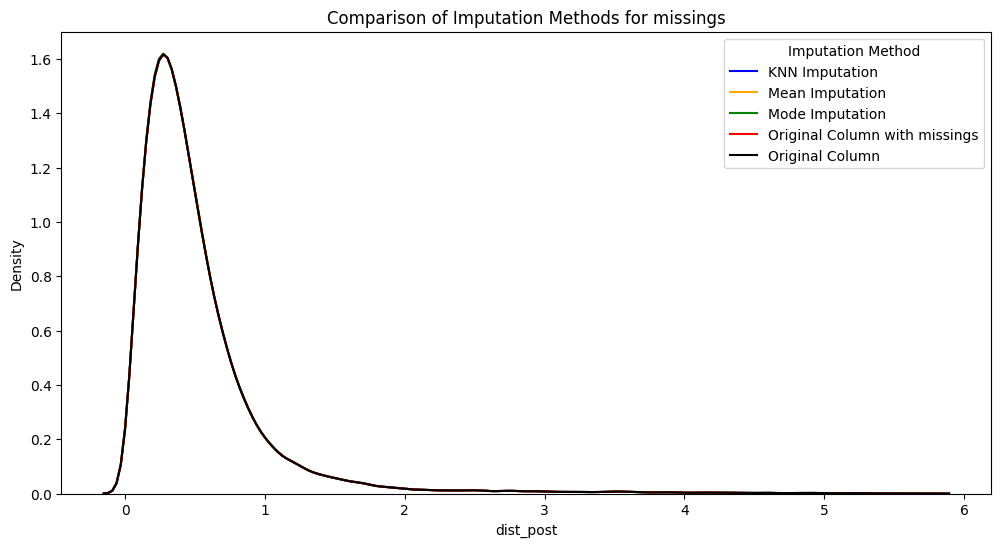

In [148]:
# and the same for variables which name starts with
# 'First_Flr_SF' (20% of non-randomly missing values)

plt.figure(figsize=(12, 6))
sns.kdeplot(data = df_train_quantitative_copy3,
             x = 'dist_post_knn',
             label = 'KNN Imputation',
             color = 'blue')
sns.kdeplot(data = df_train_quantitative_copy,
             x = 'dist_post_mean',
             label = 'Mean Imputation',
             color = 'orange')
sns.kdeplot(data = df_train_quantitative_copy2,
             x = 'dist_post_mode',
             label = 'Mode Imputation',
             color = 'green')
sns.kdeplot(data = df_train_quantitative_original,
                x = 'dist_post',
                    label = 'Original Column with missings',
                    color = 'red')
sns.kdeplot(data = df_train_quantitative_original,
                x = 'dist_post',
                    label = 'Original Column',
                    color = 'black')
# Add the legend
plt.legend(title='Imputation Method')
plt.xlabel('dist_post')
plt.ylabel('Density')
plt.title('Comparison of Imputation Methods for missings')
plt.show()

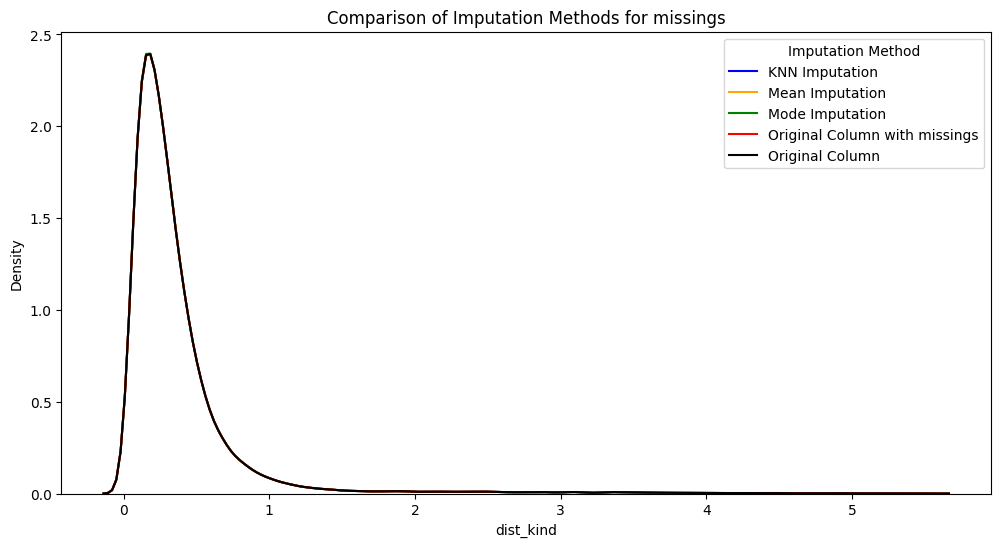

In [150]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data = df_train_quantitative_copy3,
             x = 'dist_kind_knn',
             label = 'KNN Imputation',
             color = 'blue')
sns.kdeplot(data = df_train_quantitative_copy,
             x = 'dist_kind_mean',
             label = 'Mean Imputation',
             color = 'orange')
sns.kdeplot(data = df_train_quantitative_copy2,
             x = 'dist_kind_mode',
             label = 'Mode Imputation',
             color = 'green')
sns.kdeplot(data = df_train_quantitative_original,
                x = 'dist_kind',
                    label = 'Original Column with missings',
                    color = 'red')
sns.kdeplot(data = df_train_quantitative_original,
                x = 'dist_kind',
                    label = 'Original Column',
                    color = 'black')
# Add the legend
plt.legend(title='Imputation Method')
plt.xlabel('dist_kind')
plt.ylabel('Density')
plt.title('Comparison of Imputation Methods for missings')
plt.show()

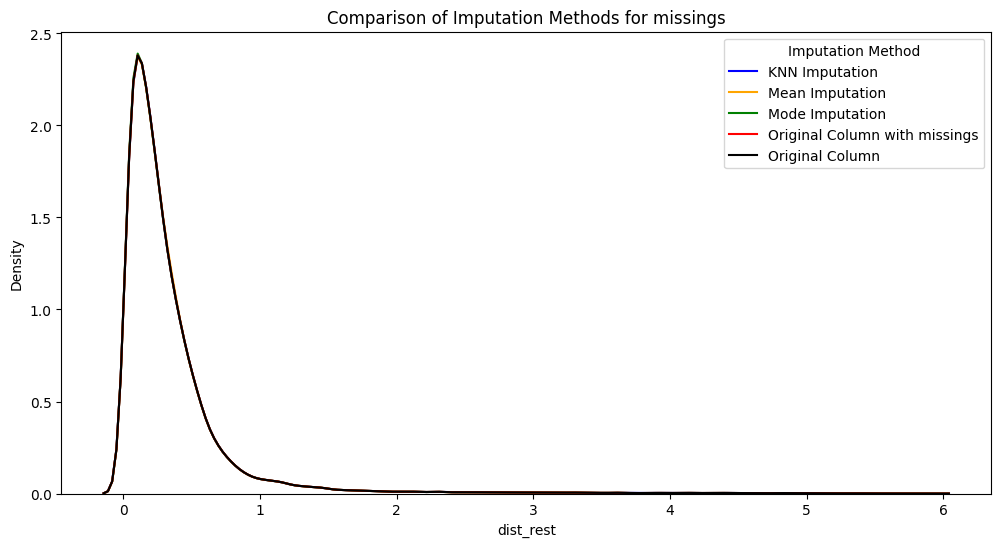

In [152]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data = df_train_quantitative_copy3,
             x = 'dist_rest_knn',
             label = 'KNN Imputation',
             color = 'blue')
sns.kdeplot(data = df_train_quantitative_copy,
             x = 'dist_rest_mean',
             label = 'Mean Imputation',
             color = 'orange')
sns.kdeplot(data = df_train_quantitative_copy2,
             x = 'dist_rest_mode',
             label = 'Mode Imputation',
             color = 'green')
sns.kdeplot(data = df_train_quantitative_original,
                x = 'dist_rest',
                    label = 'Original Column with missings',
                    color = 'red')
sns.kdeplot(data = df_train_quantitative_original,
                x = 'dist_rest',
                    label = 'Original Column',
                    color = 'black')
# Add the legend
plt.legend(title='Imputation Method')
plt.xlabel('dist_rest')
plt.ylabel('Density')
plt.title('Comparison of Imputation Methods for missings')
plt.show()

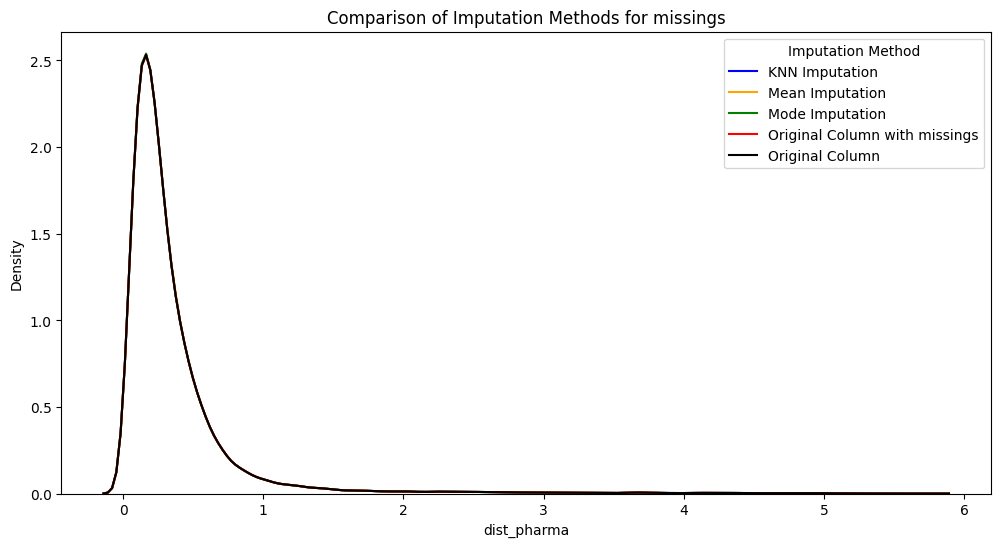

In [154]:
# and the same for variables which name starts with
# 'First_Flr_SF' (20% of non-randomly missing values)

plt.figure(figsize=(12, 6))
sns.kdeplot(data = df_train_quantitative_copy3,
             x = 'dist_pharma_knn',
             label = 'KNN Imputation',
             color = 'blue')
sns.kdeplot(data = df_train_quantitative_copy,
             x = 'dist_pharma_mean',
             label = 'Mean Imputation',
             color = 'orange')
sns.kdeplot(data = df_train_quantitative_copy2,
             x = 'dist_pharma_mode',
             label = 'Mode Imputation',
             color = 'green')
sns.kdeplot(data = df_train_quantitative_original,
                x = 'dist_pharma',
                    label = 'Original Column with missings',
                    color = 'red')
sns.kdeplot(data = df_train_quantitative_original,
                x = 'dist_pharma',
                    label = 'Original Column',
                    color = 'black')
# Add the legend
plt.legend(title='Imputation Method')
plt.xlabel('dist_pharma')
plt.ylabel('Density')
plt.title('Comparison of Imputation Methods for missings')
plt.show()

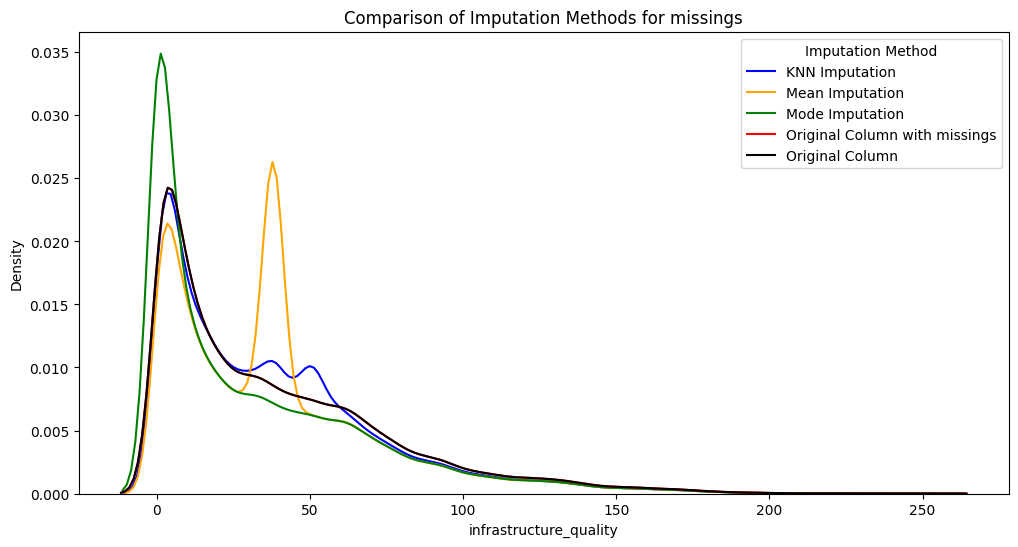

In [156]:
# and the same for variables which name starts with
# 'First_Flr_SF' (20% of non-randomly missing values)

plt.figure(figsize=(12, 6))
sns.kdeplot(data = df_train_quantitative_copy3,
             x = 'infrastructure_quality_knn',
             label = 'KNN Imputation',
             color = 'blue')
sns.kdeplot(data = df_train_quantitative_copy,
             x = 'infrastructure_quality_mean',
             label = 'Mean Imputation',
             color = 'orange')
sns.kdeplot(data = df_train_quantitative_copy2,
             x = 'infrastructure_quality_mode',
             label = 'Mode Imputation',
             color = 'green')
sns.kdeplot(data = df_train_quantitative_original,
                x = 'infrastructure_quality',
                    label = 'Original Column with missings',
                    color = 'red')
sns.kdeplot(data = df_train_quantitative_original,
                x = 'infrastructure_quality',
                    label = 'Original Column',
                    color = 'black')
# Add the legend
plt.legend(title='Imputation Method')
plt.xlabel('infrastructure_quality')
plt.ylabel('Density')
plt.title('Comparison of Imputation Methods for missings')
plt.show()

---
After analysis we found out that KNN Imputation is the best to handle missing data in quantitative columns

---

In [169]:
df_train_copy = df_train.copy()
df_valid_copy = df_valid.copy()
df_test_copy = df_test.copy()

In [171]:
imputer_knn = KNNImputer(
    n_neighbors = 5,
    # remember that distance weighting worked better
    weights = 'distance'
)

df_train[quantitative_cols] = imputer_knn.fit_transform(
    df_train[quantitative_cols]
)

In [173]:
df_train.isna().sum()

unit_id                           0
obj_type                      20320
dim_m2                            0
n_rooms                           0
floor_no                          0
floor_max                         0
year_built                        0
dist_centre                       0
n_poi                             0
dist_sch                          0
dist_clinic                       0
dist_post                         0
dist_kind                         0
dist_rest                         0
dist_uni                          0
dist_pharma                       0
own_type                          0
build_mat                     37231
cond_class                    70295
has_park                          0
has_balcony                       0
has_lift                       4643
has_sec                           0
has_store                         0
price_z                           0
src_month                         0
loc_code                          0
market_volatility           

In [191]:
# imputer_knn = KNNImputer(
#     n_neighbors = 5,
#     # remember that distance weighting worked better
#     weights = 'distance'
# )

# it was initialized in above cell

df_valid[quantitative_cols] = imputer_knn.transform(
    df_valid[quantitative_cols]
)

df_test[quantitative_cols] = imputer_knn.transform(
    df_test[quantitative_cols]
)

In [199]:
df_test.isna().sum()

unit_id                           0
obj_type                       6766
dim_m2                            0
n_rooms                           0
floor_no                          0
floor_max                         0
year_built                        0
dist_centre                       0
n_poi                             0
dist_sch                          0
dist_clinic                       0
dist_post                         0
dist_kind                         0
dist_rest                         0
dist_uni                          0
dist_pharma                       0
own_type                          0
build_mat                     12433
cond_class                    23338
has_park                          0
has_balcony                       0
has_lift                       1537
has_sec                           0
has_store                         0
price_z                           0
src_month                         0
loc_code                          0
market_volatility           

## Qualitative Variables

In [178]:
df_train[qualitative_cols].info()

<class 'pandas.core.frame.DataFrame'>
Index: 93872 entries, 45366 to 15725
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   obj_type    73552 non-null  object
 1   build_mat   56641 non-null  object
 2   cond_class  23577 non-null  object
 3   has_lift    89229 non-null  object
dtypes: object(4)
memory usage: 3.6+ MB


In [180]:
for col in qualitative_cols:
    print(f'Frequency count for {col}:')
    print(df_train[col].value_counts(dropna=False, normalize = True))
    print('')

Frequency count for obj_type:
obj_type
0d6c4dfc    0.466156
NaN         0.216465
2a6d5c01    0.166567
0c238f18    0.150812
Name: proportion, dtype: float64

Frequency count for build_mat:
build_mat
7ceffe3b    0.468841
NaN         0.396615
7f8c00f9    0.134545
Name: proportion, dtype: float64

Frequency count for cond_class:
cond_class
NaN         0.748839
a2881958    0.142439
53cced8d    0.108723
Name: proportion, dtype: float64

Frequency count for has_lift:
has_lift
no     0.477555
yes    0.472984
NaN    0.049461
Name: proportion, dtype: float64



In [201]:
df_train.drop(['cond_class'], axis = 1, inplace = True)

In [203]:
df_valid.drop(['cond_class'], axis = 1, inplace = True)
df_test.drop(['cond_class'], axis = 1, inplace = True)

In [209]:
qualitative_cols.remove('cond_class')

In [215]:
df_train[qualitative_cols].columns.tolist()

['obj_type', 'build_mat', 'has_lift']

---
Filling Categorical Missing Values with "Unknown"

---

In [218]:
df_train[qualitative_cols] = df_train[qualitative_cols].fillna('Unknown')
df_valid[qualitative_cols] = df_valid[qualitative_cols].fillna('Unknown')
df_test[qualitative_cols] = df_test[qualitative_cols].fillna('Unknown')

In [220]:
df_test.isna().sum()

unit_id                       0
obj_type                      0
dim_m2                        0
n_rooms                       0
floor_no                      0
floor_max                     0
year_built                    0
dist_centre                   0
n_poi                         0
dist_sch                      0
dist_clinic                   0
dist_post                     0
dist_kind                     0
dist_rest                     0
dist_uni                      0
dist_pharma                   0
own_type                      0
build_mat                     0
has_park                      0
has_balcony                   0
has_lift                      0
has_sec                       0
has_store                     0
price_z                       0
src_month                     0
loc_code                      0
market_volatility             0
infrastructure_quality        0
neighborhood_crime_rate       0
popularity_index              0
green_space_ratio             0
estimate

# Transformation of the Y variable

In [235]:
import matplotlib.ticker as mtick

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

from scipy.stats import boxcox, yeojohnson # for power transformations

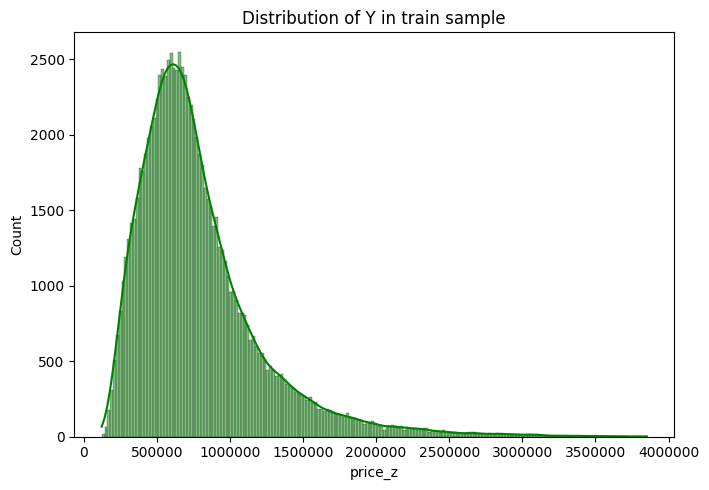

In [229]:
plt.figure(figsize=(7, 5))
sns.histplot(df_train['price_z'], kde = True, edgecolor='black', color='green')
plt.title('Distribution of Y in train sample')
# plt.xlabel('')
# plt.ylabel('')
# plt.grid()
# plt.xscale('log')
plt.tight_layout()
plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:.0f}')) 
plt.show()

In [239]:
# sns.histplot(
#     np.log(df_train['price_z'] + 1),
#     kde = True
# )

In [233]:
df_train_y_log = np.log(df_train['price_z'] + 1)

In [237]:
df_train_y_boxcox, fitted_lambda = boxcox(df_train['price_z'])

print(fitted_lambda)

-0.03859000446371635


In [241]:
df_train_y_yeojohnson, fitted_lambda2 = yeojohnson(df_train['price_z'])

print(fitted_lambda2)

-0.038591677379185105


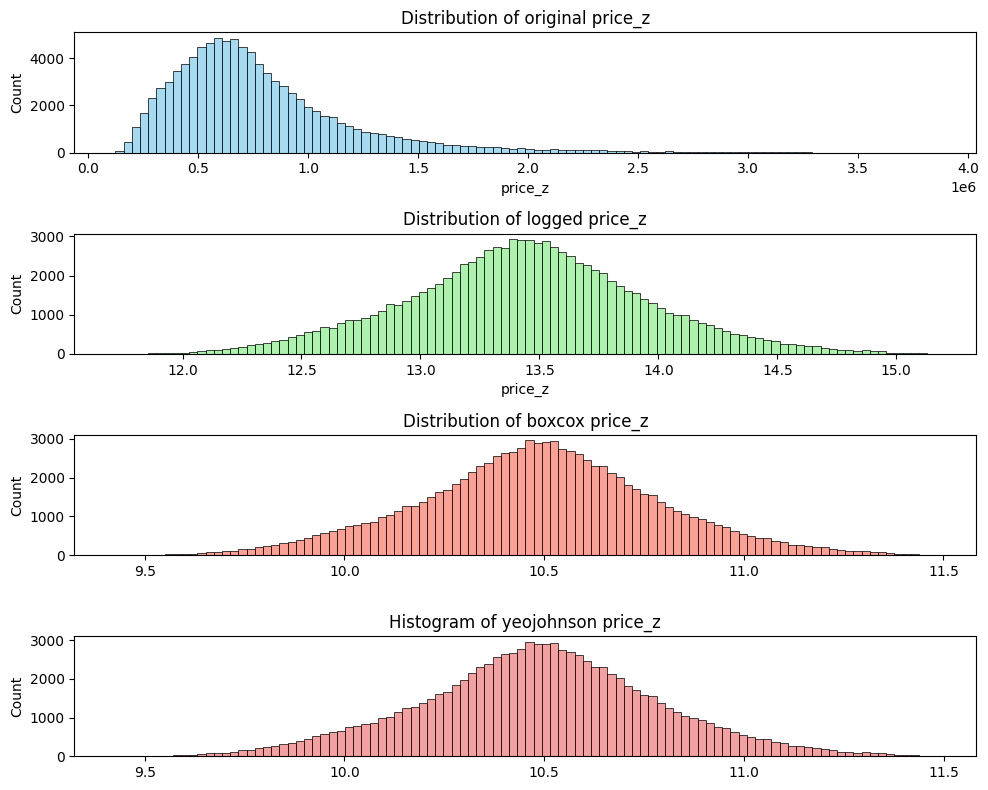

In [243]:
fig, axs = plt.subplots(4, 1, figsize = (10, 8)) # 4 rows, 1 column

sns.histplot(
    df_train['price_z'],
    bins = 100,
    ax = axs[0],
    color = 'skyblue'
)
axs[0].set_title('Distribution of original price_z')

sns.histplot(
    df_train_y_log,
    bins = 100,
    ax = axs[1],
    color = 'lightgreen'
)
axs[1].set_title('Distribution of logged price_z')

sns.histplot(
    df_train_y_boxcox,
    bins = 100,
    ax = axs[2],
    color = 'salmon'
)
axs[2].set_title('Distribution of boxcox price_z')

sns.histplot(
    df_train_y_yeojohnson,
    bins = 100, 
    ax = axs[3],
    color = 'lightcoral'
)
axs[3].set_title('Histogram of yeojohnson price_z')

plt.tight_layout()
plt.show()

---
Based on the results above, we will go for logged price_z (the simple approach)

---

In [247]:
df_train['price_z'] = np.log(df_train['price_z'] + 1)
df_valid['price_z'] = np.log(df_valid['price_z'] + 1)
df_test['price_z'] = np.log(df_test['price_z'] + 1)

# Near Zero Variance

In [277]:
import sys
sys.path.append('../src')  # adjust path if needed

# importing function from .py file
from near_zero_variance import near_zero_var 

In [317]:
df_train_nzv = near_zero_var(df_train, freq_cut = 90/10, unique_cut=1500)
df_train_nzv

,variable,freq_ratio,unique_ratio,high_freq_ratio,low_unique_ratio
16,own_type,9.055597,0.003196,1,1
21,has_sec,7.899507,0.002131,0,1
18,has_park,2.676641,0.002131,0,1
1,obj_type,2.153494,0.004261,0,1
25,loc_code,2.046450,0.015979,0,1
5,floor_max,1.705487,1.197375,0,1
30,green_space_ratio,1.695039,0.003196,0,1
19,has_balcony,1.332977,0.002131,0,1
22,has_store,1.305418,0.002131,0,1
8,n_poi,1.294454,0.202403,0,1


In [319]:
df_train_nzv[(df_train_nzv['low_unique_ratio'] == 1) & (df_train_nzv['high_freq_ratio'] == 1)]

,variable,freq_ratio,unique_ratio,high_freq_ratio,low_unique_ratio
16,own_type,9.055597,0.003196,1,1


In [313]:
# in case problematic variables exist - remove them

own_type is near-zero variance (both high_freq_ratio=1 and low_unique_ratio=1), so it’s safe to remove it from your features.

In [322]:
df_train['own_type'].value_counts(normalize=True)

own_type
12631efb    0.900524
bfb8fe10    0.099444
4e625087    0.000032
Name: proportion, dtype: float64

In [324]:
# delete "own_type" as it is near-zero variance

df_train.drop(['own_type'], axis=1, inplace = True)
df_valid.drop(['own_type'], axis=1, inplace = True)
df_test.drop(['own_type'], axis=1, inplace = True)

In [326]:
df_train.columns

Index(['unit_id', 'obj_type', 'dim_m2', 'n_rooms', 'floor_no', 'floor_max',
       'year_built', 'dist_centre', 'n_poi', 'dist_sch', 'dist_clinic',
       'dist_post', 'dist_kind', 'dist_rest', 'dist_uni', 'dist_pharma',
       'build_mat', 'has_park', 'has_balcony', 'has_lift', 'has_sec',
       'has_store', 'price_z', 'src_month', 'loc_code', 'market_volatility',
       'infrastructure_quality', 'neighborhood_crime_rate', 'popularity_index',
       'green_space_ratio', 'estimated_maintenance_cost',
       'global_economic_index'],
      dtype='object')

In [328]:
df_train.head()

,unit_id,obj_type,dim_m2,n_rooms,floor_no,floor_max,year_built,dist_centre,n_poi,dist_sch,...,price_z,src_month,loc_code,market_volatility,infrastructure_quality,neighborhood_crime_rate,popularity_index,green_space_ratio,estimated_maintenance_cost,global_economic_index
45366,f13df795472bee05,Unknown,59.39,3.0,3.0,4.0,1980.0,2.578,19.0,0.326,...,12.834406,2023-12,533f6886,358182.61,50.29,19.44,43.22,1.000,17.98,93.327971
86630,003ffcbd3294c3c9,0d6c4dfc,52.95,2.0,2.0,6.0,2023.0,8.413,13.0,0.387,...,13.570913,2023-12,693f303c,795187.23,1.13,77.42,31.27,0.999,24.08,94.280615
139489,f5d1fc8f4a154cd4,0d6c4dfc,24.55,2.0,2.0,4.0,1993.0,4.479,2.0,0.561,...,13.362486,2024-06,693f303c,599098.08,21.12,90.45,70.33,1.000,9.25,108.618716
24126,02376da3fe009bb0,Unknown,57.58,3.0,3.0,3.0,2017.0,13.367,0.0,1.195,...,14.072345,2024-05,693f303c,1503238.02,8.08,46.21,39.09,0.999,8.48,100.635935
151982,7b6bb74dcdff86a3,2a6d5c01,73.71,3.0,1.0,2.0,2016.0,9.365,0.0,2.159,...,13.705193,2023-10,693f303c,893331.75,9.38,42.41,59.41,0.999,24.94,93.385347


# Encoding

In [347]:
for col in qualitative_cols:
    print(df_train[col].value_counts())
    print()

obj_type
0d6c4dfc    43759
Unknown     20320
2a6d5c01    15636
0c238f18    14157
Name: count, dtype: int64

build_mat
7ceffe3b    44011
Unknown     37231
7f8c00f9    12630
Name: count, dtype: int64

has_lift
no         44829
yes        44400
Unknown     4643
Name: count, dtype: int64



---
You can see that we do not have `Ordinal` variables here

---

## Encoding Nominal Variables

In [351]:
nominal_variables = qualitative_cols

In [355]:
df_train_encoded = pd.get_dummies(
    df_train,
    columns = nominal_variables,
    drop_first = True,
    dtype = int
)

df_valid_encoded = pd.get_dummies(
    df_valid, 
    columns = nominal_variables,
    drop_first = True,
    dtype = int
)

df_test_encoded = pd.get_dummies(
    df_test,
    columns = nominal_variables,
    drop_first = True,
    dtype = int
)

In [365]:
df_train_encoded.columns.tolist()

['unit_id',
 'dim_m2',
 'n_rooms',
 'floor_no',
 'floor_max',
 'year_built',
 'dist_centre',
 'n_poi',
 'dist_sch',
 'dist_clinic',
 'dist_post',
 'dist_kind',
 'dist_rest',
 'dist_uni',
 'dist_pharma',
 'has_park',
 'has_balcony',
 'has_sec',
 'has_store',
 'price_z',
 'src_month',
 'loc_code',
 'market_volatility',
 'infrastructure_quality',
 'neighborhood_crime_rate',
 'popularity_index',
 'green_space_ratio',
 'estimated_maintenance_cost',
 'global_economic_index',
 'obj_type_0d6c4dfc',
 'obj_type_2a6d5c01',
 'obj_type_Unknown',
 'build_mat_7f8c00f9',
 'build_mat_Unknown',
 'has_lift_no',
 'has_lift_yes']

In [367]:
with open('../Data/after_feature_engineering.pkl', 'wb') as f:
    pickle.dump(df_train, f)
    pickle.dump(df_valid, f)
    pickle.dump(df_test, f)
    pickle.dump(df_train_encoded, f)
    pickle.dump(df_valid_encoded, f)
    pickle.dump(df_test_encoded, f)